<a href="https://colab.research.google.com/github/SeokcheonMoon/study_data_analytics/blob/main/docs/quests/EDA/EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime 이후 상단바 런타임의 Restart Session 을 클릭해야함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [ ]:
df_car = pd.read_csv("LetalCarOfContractType.csv")

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [ ]:
df_car

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,66579515,NaN,Promotion,R관리방판,2020-02-03,60,무통장,K3,96900,계약확정,0,없음,NaN,롯데카드,정상,NaN,NaN
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0
51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0
51302,66792778,NaN,Normal,렌탈총판,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,신한카드,정상,64.0,2588.0


## 목표 제안
- 제안 7: 지불 방식에 따른 고객 행동 분석

- 문제 정의: 다양한 지불 방식(예: CMS, 카드 이체 등)을 사용하는 고객들의 행동 패턴을 분석합니다.

- 배경: 지불 방식에 따른 고객 행동을 이해함으로써, 효율적인 결제 시스템을 설계하고 고객 서비스를 개선할 수 있습니다.



### 단순 지불방식 분포 확인

In [ ]:
# 지불방식 분포 확인
# 가장 많은 지불방식 : CMS
# 인사이트 : 타겟층을 CMS 결제 고객으로 하는 이벤트 및 프로모션 수립 고려

df_car["payment_type"].value_counts()

CMS     32825
카드이체    15717
무통장      2085
가상계좌      612
지로         65
Name: payment_type, dtype: int64

In [ ]:
df_car["payment_type"].describe(include = object)

count     51304
unique        5
top         CMS
freq      32825
Name: payment_type, dtype: object

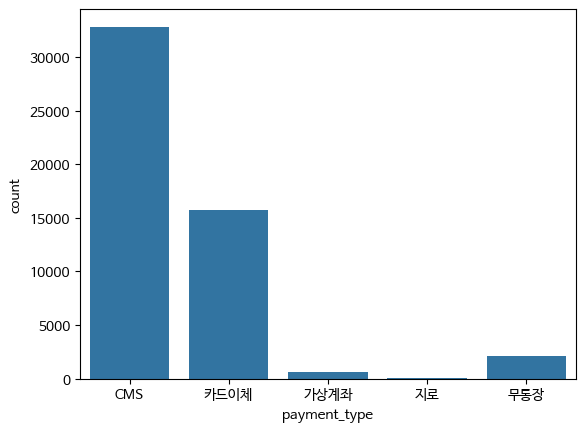

In [ ]:
sns.countplot(data= df_car, x = "payment_type")
plt.show()

### 나이별 - 지불방식 분포 확인

#### 기준 1
- 자동차를 많이 렌트할 것 같은 연령대 : 20대이상 70대 이하
- age가 null값인 경우는 제외하고 추출

#### 기준 2
- 지불방식 : CMS, 카드이체, 무통장, 가상계좌, 지로

#### 방법
- 기준1에 해당하는 데이터를 가지고 기준 2에 해당하는 항목과 매치
- 다섯가지 차트를 출력

#### 인사이트 : 20~70대 사이에서 지불방식이 CMS,카드이체가 독보적인 것을 알 수 있음. 해당 지불방식에 대한 혜택 추가 고려

In [ ]:
condition_CMS = "payment_type == 'CMS'"
condition_카드이체 = "payment_type == '카드이체'"
condition_무통장 = "payment_type == '무통장'"
condition_가상계좌 = "payment_type == '가상계좌'"
condition_지로 = "payment_type == '지로'"

condition_age = "20<= age <= 70"

conditions_CMS_age = f"{condition_CMS} and {condition_age}"
conditions_카드이체_age = f"{condition_카드이체} and {condition_age}"
conditions_무통장_age = f"{condition_무통장} and {condition_age}"
conditions_가상계좌_age = f"{condition_가상계좌} and {condition_age}"
conditions_지로_age = f"{condition_지로} and {condition_age}"

df_car.query(conditions_CMS_age)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
5,66165241,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K3,90900,계약확정,0,없음,5.0,국민은행,정상,52.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51286,66441028,렌탈,Extension_Rental,R관리방판,2020-02-03,60,CMS,K2,78900,계약확정,0,없음,1.0,롯데카드,정상,51.0,2012.0
51290,66799369,렌탈,Normal,R관리방판,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,1.0,국민은행,해약,48.0,2065.0
51294,66799558,렌탈,Normal,R관리방판,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,새마을금고,해약,35.0,1627.0
51297,66799607,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,신한은행,해약,70.0,2623.0


In [ ]:
df_car.query(conditions_카드이체_age)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
6,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,98400,계약확정,0,없음,1.0,롯데카드,정상,59.0,2348.0
8,66758007,렌탈,Normal,서비스 방문,2019-10-20,60,카드이체,K3,102900,계약확정,0,없음,2.0,롯데카드,정상,61.0,2447.0
10,66757254,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,81900,계약확정,0,없음,1.0,국민카드,정상,37.0,1555.0
11,66757254,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K2,81900,계약확정,0,없음,1.0,국민카드,정상,28.0,1503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51292,66792261,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,1.0,롯데카드,정상,46.0,1779.0
51295,66799197,렌탈,Promotion,영업방판,2020-02-03,39,카드이체,K5,120900,해약확정,0,없음,1.0,롯데카드,해약,48.0,1869.0
51296,66792778,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,롯데카드,정상,44.0,1947.0
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0


In [ ]:
df_car.query(conditions_무통장_age)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
48200,66796990,멤버십,TA2,하이마트,2020-01-28,36,무통장,K1,56979,계약확정,0,없음,3.0,NaN,정상,20.0,1217.0
51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0


In [ ]:
df_car.query(conditions_가상계좌_age)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage


In [ ]:
df_car.query(conditions_지로_age)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage


### 금액별 지불방식 분포 확인
#### 기준 1
- 큰 금액을 정의하는 기준 고려 : 전체 결제 금액의 평균 이상

#### 기준 2
- 지불방식 : CMS, 카드이체, 무통장, 가상계좌, 지로

#### 방법
- 기준1에 해당하는 데이터를 가지고 기준 2의 각 항목과 매치
- 다섯가지 차트를 출력

#### 인사이트 : 렌트하는데에 있어 큰 액수를 결제하는 수단이 주로 CMS,카드이체임을 알 수 있음.

In [ ]:
df_car["amount"].describe()

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

In [ ]:
df_car_mean = df_car["amount"].mean()
df_car_mean

93994.98002105099

In [ ]:
condition_CMS = "payment_type == 'CMS'"
condition_카드이체 = "payment_type == '카드이체'"
condition_무통장 = "payment_type == '무통장'"
condition_가상계좌 = "payment_type == '가상계좌'"
condition_지로 = "payment_type == '지로'"

condition_mean = f"amount >{df_car_mean}"

conditions_CMS_mean = f"{condition_CMS} and {condition_mean}"
conditions_카드이체_mean = f"{condition_카드이체} and {condition_mean}"
conditions_무통장_mean = f"{condition_무통장} and {condition_mean}"
conditions_가상계좌_mean = f"{condition_가상계좌} and {condition_mean}"
conditions_지로_mean = f"{condition_지로} and {condition_mean}"

df_car.query(conditions_CMS_mean)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
9,66756702,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K1,105900,계약확정,0,없음,1.0,신한은행,정상,24.0,1172.0
13,66757861,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,1.0,국민은행,정상,34.0,1640.0
19,66758336,렌탈,Promotion,전자랜드,2019-10-20,60,CMS,K1,111900,계약확정,0,없음,9.0,농협은행,정상,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,66799369,렌탈,Normal,R관리방판,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,1.0,국민은행,해약,48.0,2065.0
51293,66579515,렌탈,Promotion,R관리방판,2020-02-03,60,CMS,K3,96900,계약확정,0,없음,NaN,기업은행,정상,NaN,NaN
51294,66799558,렌탈,Normal,R관리방판,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,새마을금고,해약,35.0,1627.0
51297,66799607,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,신한은행,해약,70.0,2623.0


In [ ]:
df_car.query(conditions_카드이체_mean)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
6,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,98400,계약확정,0,없음,1.0,롯데카드,정상,59.0,2348.0
8,66758007,렌탈,Normal,서비스 방문,2019-10-20,60,카드이체,K3,102900,계약확정,0,없음,2.0,롯데카드,정상,61.0,2447.0
17,66755490,렌탈,Promotion,렌탈총판,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,47.0,1980.0
24,66755125,렌탈,Promotion,홈쇼핑/방송,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,74.0,2947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51292,66792261,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,1.0,롯데카드,정상,46.0,1779.0
51295,66799197,렌탈,Promotion,영업방판,2020-02-03,39,카드이체,K5,120900,해약확정,0,없음,1.0,롯데카드,해약,48.0,1869.0
51296,66792778,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,롯데카드,정상,44.0,1947.0
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0


In [ ]:
df_car.query(conditions_무통장_mean)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
51299,66579515,NaN,Promotion,R관리방판,2020-02-03,60,무통장,K3,96900,계약확정,0,없음,NaN,롯데카드,정상,NaN,NaN
51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0


In [ ]:
df_car.query(conditions_가상계좌_mean)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
53,25869517,렌탈,Promotion,렌탈총판,2019-10-21,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
202,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,180750,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
203,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,180750,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
204,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,180750,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
205,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
50966,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
50967,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
50968,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN


In [ ]:
df_car.query(conditions_지로_mean)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
350,25742702,렌탈,Normal,서비스 방문,2019-10-21,60,지로,K2,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
553,25871000,렌탈,Promotion,서비스 방문,2019-10-21,60,지로,K1,124200,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
933,25796407,렌탈,Normal,서비스 방문,2019-10-22,60,지로,K1,96900,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
987,25742660,렌탈,Promotion,서비스 방문,2019-10-22,60,지로,K1,124200,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
6021,25853485,렌탈,Promotion,렌탈총판,2019-10-30,60,지로,K1,108900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
8566,66251159,렌탈,Normal,서비스 방문,2019-11-04,60,지로,K2,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
11594,25787494,렌탈,Normal,서비스 방문,2019-11-10,60,지로,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
12865,25740763,렌탈,Package,서비스 방문,2019-11-12,60,지로,K1,116700,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
14555,25864525,렌탈,Promotion,영업방판,2019-11-14,60,지로,K1,142200,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
15913,25740576,렌탈,Normal,서비스 방문,2019-11-18,60,지로,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN


### 마일리지별 - 지불방식 분포 확인

#### 기준 1
- 마일리지의 평균

#### 기준 2
- 지불방식 : CMS, 카드이체, 무통장, 가상계좌, 지로

#### 방법
- 지불방식별 각 마일리지의 평균을 추출하고 비교

#### 인사이트 : 20~70대 사이에서 지불방식이 CMS,카드이체가 독보적인 것을 알 수 있음. 해당 지불방식에 대한 혜택 추가 고려